In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_bgr = cv2.imread("/content/drive/MyDrive/Images/6/Lena.bmp")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [4]:
def quantization (image, level):
  k_means = KMeans(n_clusters=level)
  k_means.fit(image.reshape((-1,1)))

  labels = k_means.labels_
  quantized_image = k_means.cluster_centers_[labels]

  return quantized_image.reshape((image.shape))

In [5]:
def psnr(original, contrast):
  mse = np.mean((original - contrast) ** 2)

  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  
  PSNR = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

  return PSNR

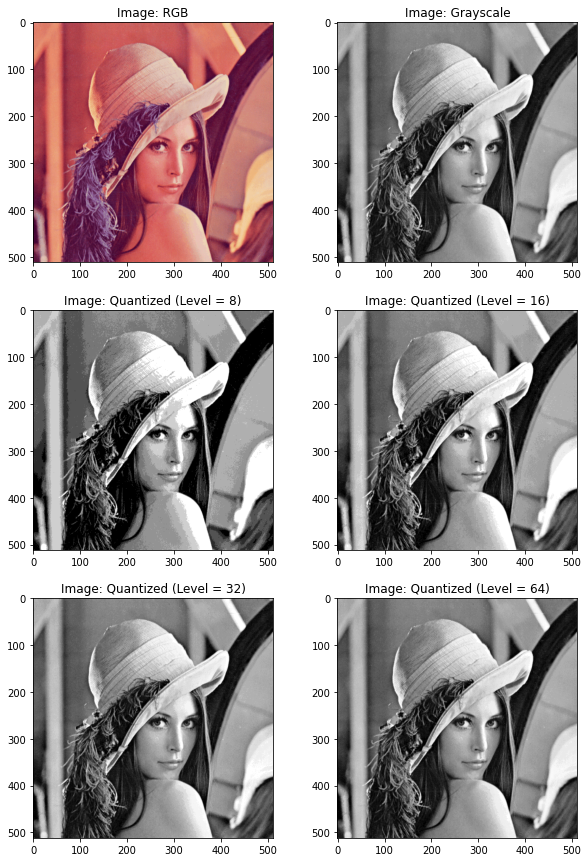

In [6]:
levels = [8, 16, 32, 64]

quantized_images_mse = np.zeros(len(levels))
quantized_images_psnr = np.zeros(len(levels))

fig, plot = plt.subplots(int(len(levels) // 2) + 1, 2, figsize = (10, 5 * (int(len(levels) // 2) + 1)))

plot[0][0].imshow(img_rgb)
plot[0][0].set_title("Image: RGB")

plot[0][1].imshow(img_gray, cmap='gray')
plot[0][1].set_title("Image: Grayscale")

for level_index in range (2, len(levels) + 2):

  quantized_image = quantization(img_gray, levels[level_index - 2])

  quantized_images_mse[level_index - 2] = mean_squared_error(img_gray, quantized_image)
  quantized_images_psnr[level_index - 2] = psnr(img_gray, quantized_image)

  plot[int(level_index // 2)][int(level_index % 2)].imshow(quantized_image, cmap='gray')
  plot[int(level_index // 2)][int(level_index % 2)].set_title("Image: Quantized (Level = " + str(levels[level_index - 2]) + ")")

In [7]:
print("Quantized Image MSE & PSNR")
for level_index in range (len(levels)):
  print("Level = " + str(levels[level_index]) + "  &  MSE = " + str(quantized_images_mse[level_index]) + "  &  PSNR = " + str(quantized_images_psnr[level_index]))

Quantized Image MSE & PSNR
Level = 8  &  MSE = 39.65225825175571  &  PSNR = 32.14812434829716
Level = 16  &  MSE = 10.796759136959697  &  PSNR = 37.79786947988076
Level = 32  &  MSE = 2.1886541422155954  &  PSNR = 44.729032224130535
Level = 64  &  MSE = 0.4045796103752088  &  PSNR = 52.06076369048712
